In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu từ file CSV, lấy các cột cần thiết và phân tích cột 'Date' làm chỉ mục
df = pd.read_csv('./Data/gld_price_data.csv', index_col='Date', parse_dates=True, usecols=['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(inplace=True)

# Loại bỏ các dòng có giá trị thiếu (NaN) trong dữ liệu
df = df.dropna()

df.info()

df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


,count,mean,min,25%,50%,75%,max,std
Date,2290,2013-03-17 08:23:41.135371008,2008-01-02 00:00:00,2010-08-20 00:00:00,2013-03-13 12:00:00,2015-10-25 00:00:00,2018-05-16 00:00:00,NaN
SPX,2290.0,1654.315776,676.530029,1239.874969,1551.434998,2073.01007,2872.870117,519.11154
GLD,2290.0,122.732875,70.0,109.725,120.580002,132.840004,184.589996,23.283346
USO,2290.0,31.842221,7.96,14.38,33.869999,37.827501,117.480003,19.523517
SLV,2290.0,20.084997,8.85,15.57,17.2685,22.8825,47.259998,7.092566
EUR/USD,2290.0,1.283653,1.039047,1.171313,1.303297,1.369971,1.598798,0.131547


In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Gán dữ liệu cho biến X (biến phụ thuộc) và y (biến độc lập)
X = df[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = df['GLD']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

#  Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá trị
y_pred = model.predict(X_test)

# Tính chỉ số đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Residuals (phần dư) sự khác biệt giữa giá trị thực tế (observed value) và giá trị dự đoán (predicted value
residuals = y_test - y_pred

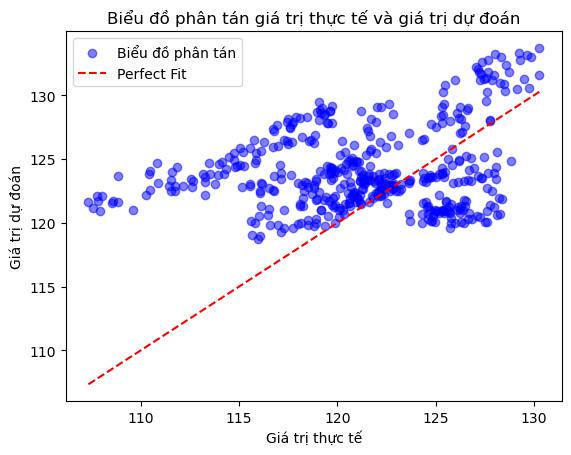

In [5]:
# Scatter plot (biểu đồ phân tán) giữa giá trị thực tế và giá trị dự đoán
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Biểu đồ phân tán')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ phân tán giá trị thực tế và giá trị dự đoán')
plt.legend()
plt.show()


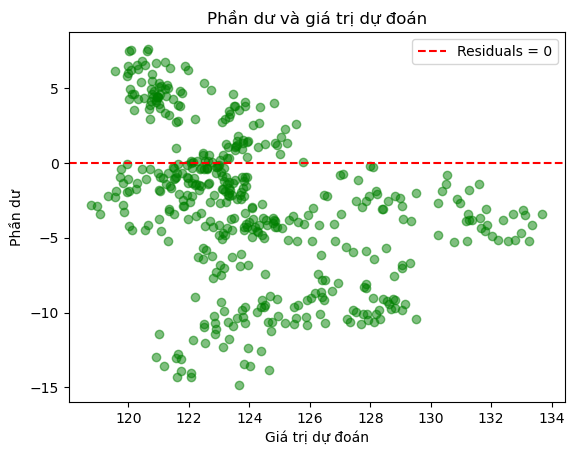

In [6]:
# scatter residuals
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--', label='Residuals = 0')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Phần dư')
plt.title('Phần dư và giá trị dự đoán')
plt.legend()
plt.show()


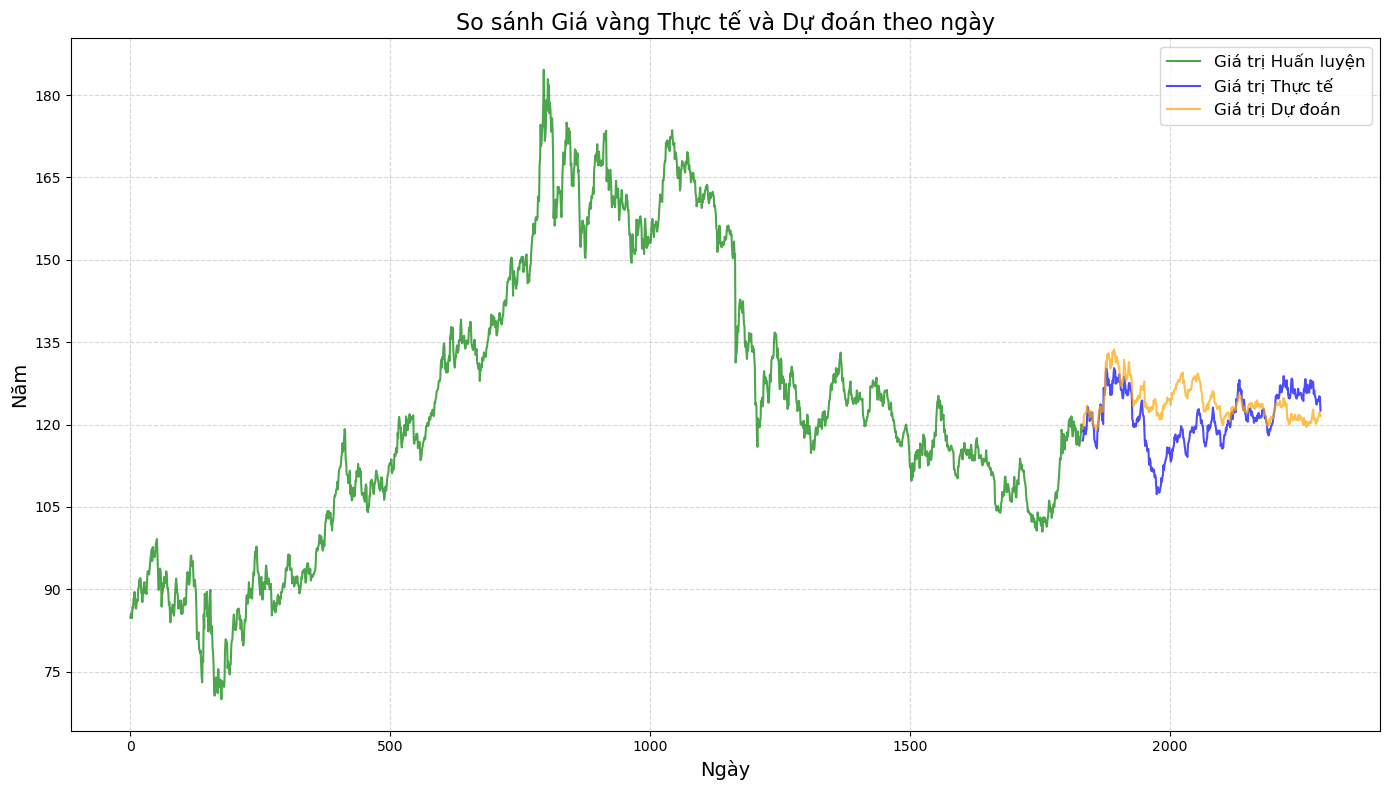

In [7]:
# Kiểm tra phân phối của phần dư
train_index = X_train.index
test_index = X_test.index


# Vẽ biểu đồ
plt.figure(figsize=(14, 8))

# Vẽ giá trị huấn luyện
plt.plot(train_index, y_train, label='Giá trị Huấn luyện', color='green', alpha=0.7)

# Vẽ giá thực tế
plt.plot(test_index, y_test, label='Giá trị Thực tế', color='blue', alpha=0.7)

# Vẽ giá dự đoán
plt.plot(test_index, y_pred, label='Giá trị Dự đoán', color='orange', alpha=0.7)

# Cài đặt trục và nhãn
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Trục Y là số nguyên (năm)
plt.title("So sánh Giá vàng Thực tế và Dự đoán theo ngày", fontsize=16)
plt.xlabel("Ngày", fontsize=14)
plt.ylabel("Năm", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [12]:
print("Đánh giá mô hình:")
print(f"Test Size: 0.2")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2: {r2}\n")

Đánh giá mô hình:
Test Size: 0.2
RMSE: 5.81709117875045
MAE: 4.641271350181612
MAPE: 0.03910375367298621
R2: -0.444038019171068

